<a href="https://colab.research.google.com/github/Fahma-n/Deep-Learning/blob/main/Diabetes_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/diabetes/pima-indians-diabetes.data.csv")
data

,times_pregnant,glucose_concentration,diastolic_blood_pressure,triceps_sf_thickness,serum_insulin,bmi,d_pedigree_function,years_of_age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.isnull().sum()

times_pregnant              0
glucose_concentration       0
diastolic_blood_pressure    0
triceps_sf_thickness        0
serum_insulin               0
bmi                         0
d_pedigree_function         0
years_of_age                0
diabetes                    0
dtype: int64

In [ ]:
data.columns

Index(['times_pregnant', 'glucose_concentration', 'diastolic_blood_pressure',
       'triceps_sf_thickness', 'serum_insulin', 'bmi', 'd_pedigree_function',
       'years_of_age', 'diabetes'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
w=('times_pregnant', 'glucose_concentration', 'diastolic_blood_pressure',
       'triceps_sf_thickness', 'serum_insulin', 'bmi', 'd_pedigree_function',
       'years_of_age', 'diabetes')
for i in w:
    data[i]=le.fit_transform(data[i])
data

,times_pregnant,glucose_concentration,diastolic_blood_pressure,triceps_sf_thickness,serum_insulin,bmi,d_pedigree_function,years_of_age,diabetes
0,6,86,22,28,0,123,350,29,1
1,1,23,19,22,0,62,196,10,0
2,8,121,17,0,0,30,368,11,1
3,1,27,19,16,62,77,53,0,0
4,0,75,4,28,102,209,514,12,1
...,...,...,...,...,...,...,...,...,...
763,10,39,25,41,108,118,55,42,0
764,2,60,21,20,0,155,187,6,0
765,5,59,22,16,71,58,115,9,0
766,1,64,14,0,0,95,195,26,1


<Axes: >

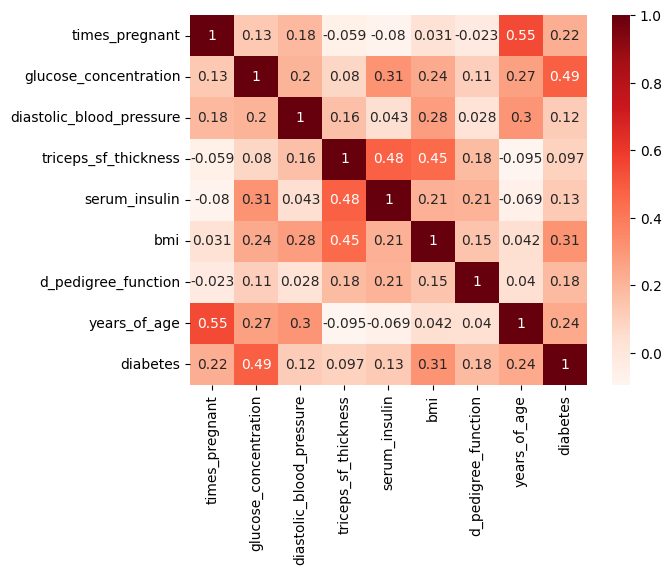

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap="Reds")

In [ ]:
x=data.drop("diabetes",axis=1)
x

,times_pregnant,glucose_concentration,diastolic_blood_pressure,triceps_sf_thickness,serum_insulin,bmi,d_pedigree_function,years_of_age
0,6,86,22,28,0,123,350,29
1,1,23,19,22,0,62,196,10
2,8,121,17,0,0,30,368,11
3,1,27,19,16,62,77,53,0
4,0,75,4,28,102,209,514,12
...,...,...,...,...,...,...,...,...
763,10,39,25,41,108,118,55,42
764,2,60,21,20,0,155,187,6
765,5,59,22,16,71,58,115,9
766,1,64,14,0,0,95,195,26


In [ ]:
y=data["diabetes"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

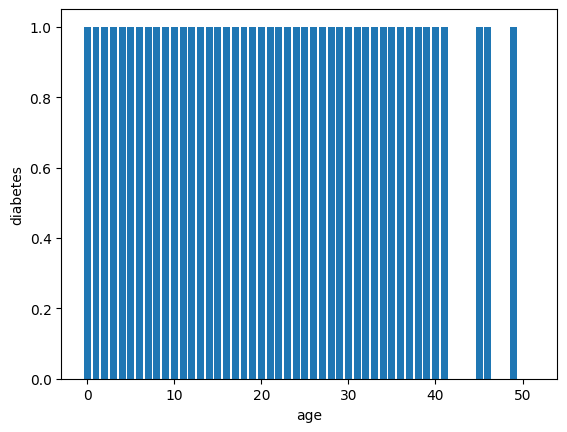

In [ ]:
x=data["years_of_age"]
y=data["diabetes"]
plt.xlabel("age")
plt.ylabel("diabetes")

plt.bar(x,y)
plt.plot()
plt.show()

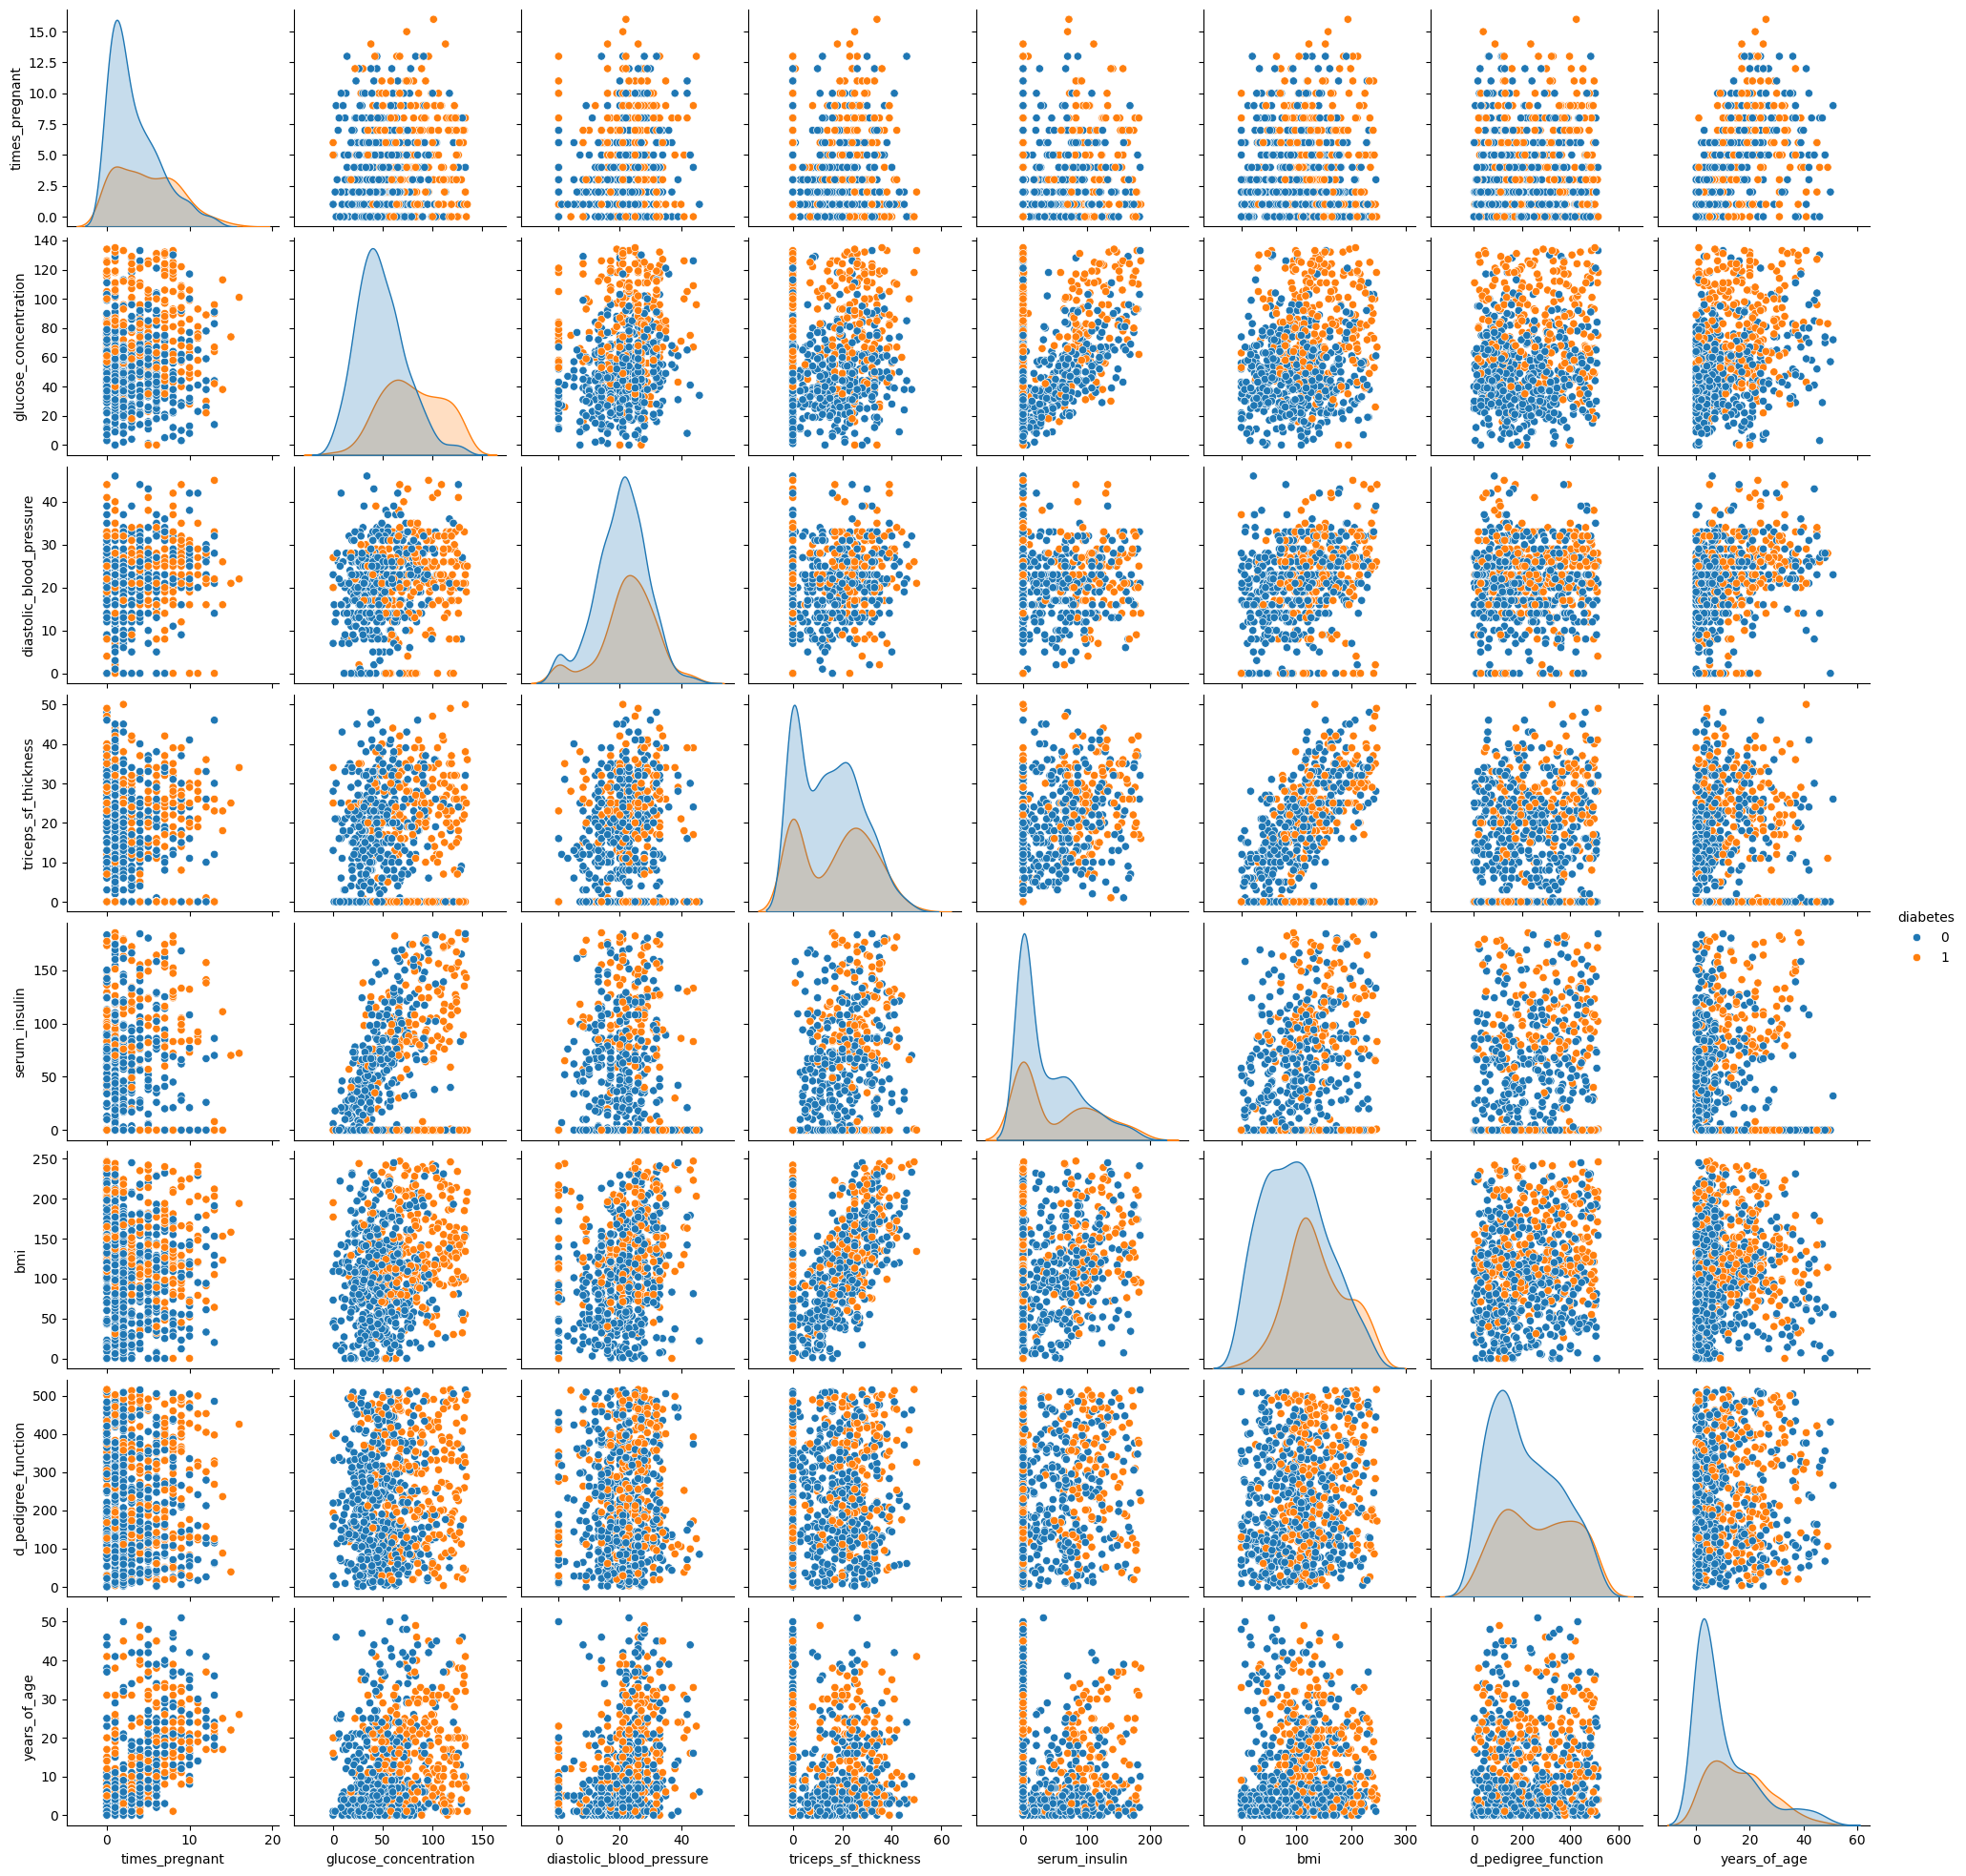

In [ ]:
import seaborn as sns
sns.pairplot(data,hue="diabetes")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

In [ ]:
xtrain.shape

(614,)

In [ ]:
len(xtrain)

614

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
import tensorflow as tf
from tensorflow import keras

In [ ]:
len(xtrain.columns)

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
ytrain.shape

(614,)

In [ ]:
model=Sequential()
model.add(Dense(units=32,input_dim=len(xtrain.columns)))
model.add(Activation("relu"))
model.add(Dropout(rate=0.45))
model.add(Dense(units=32))
model.add(Activation("relu"))
model.add(Dropout(rate=0.45))
model.add(Dense(units=1))
model.add(Activation("sigmoid"))
model.summary()



AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
print(f"model input shape: {model.input_shape}")
print(f"model output shape: {model.output_shape}")

model input shape: (None, 614)
model output shape: (None, 1)


In [ ]:
model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [ ]:
print(model.layers[0].input_shape)

(None, 614)


In [ ]:
history=model.fit(xtrain, ytrain, epochs=20, verbose=1, batch_size=10)

Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 614, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=True
      • mask=None


In [ ]:
loss,accuracy=model.evaluate(xtest,ytest,batch_size=10)

In [ ]:
print("\n %f%%"%(100.0*accuracy))

In [ ]:
plt.plot(history.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()
